<a href="https://colab.research.google.com/github/alecwight/random_examples/blob/master/Penguins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Penguins
While browsing Twitter I saw a really cool tweet about an alternative to the classic Iris dataset that instead used data about penguins. The data is available as an R package but I thought I would duplicate the author's [GitHub](https://github.com/allisonhorst/penguins) README examples in python. 

While going through this exercise I realized how much I miss dplyr and ggplot2 for data processing and visualization. 

Lastly, the illustrations the author's have on the GitHub page are worth seeing. Amazing artwork that really sets the standard high for datasets.

pyjanitor isn't a library that comes pre-loaded on Google Colab notebooks. We will install it using pip.

In [1]:
!pip install pyjanitor

     |████████████████████████████████| 71kB 2.1MB/s 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import janitor

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Get data directly from the Environmental Data Initiative
# Adelie penguin data from: https://doi.org/10.6073/pasta/abc50eed9138b75f54eaada0841b9b86

uri_adelie = "https://portal.edirepository.org/nis/dataviewer?packageid=knb-lter-pal.219.3&entityid=002f3893385f710df69eeebe893144ff"

# Gentoo penguin data from: https://doi.org/10.6073/pasta/2b1cff60f81640f182433d23e68541ce

uri_gentoo = "https://portal.edirepository.org/nis/dataviewer?packageid=knb-lter-pal.220.3&entityid=e03b43c924f226486f2f0ab6709d2381"

# Chinstrap penguin data from: https://doi.org/10.6073/pasta/409c808f8fc9899d02401bdb04580af7
uri_chinstrap = "https://portal.edirepository.org/nis/dataviewer?packageid=knb-lter-pal.221.2&entityid=fe853aa8f7a59aa84cdd3197619ef462"

# Combining the URIs into a list
uris = [uri_adelie, uri_gentoo, uri_chinstrap]

# Read each of the csv files in the list.
penguins_lter = [pd.read_csv(f) for f in uris]
# Concatenate all of the data together
penguins_df = pd.concat(penguins_lter, ignore_index=True)

In [0]:
# Alternatively, we can get the data directly from the penguins_raw.csv file on GitHub. 
# github_path = 'https://raw.githubusercontent.com/allisonhorst/penguins/master/data-raw/penguins_raw.csv'

# Make use of the Janitor library and use the clean_names method to clean up the column names. 
penguins_df = pd.read_csv(github_path).clean_names()

In [0]:
# Create a new column called "species_short" that takes the first word of the species column indicating the type of penguin. 
penguins_df['species_short'] = penguins_df['species'].str.split(' ').str[0]

# Subset the data to only include a few of the columns we are interested in.
penguins_df = penguins_df[['species_short', 'island','culmen_length_mm_', 'culmen_depth_mm_', 'flipper_length_mm_', 'body_mass_g_', 'sex']]

In [16]:
#Validate that our data transformations did what we were expecting.
penguins_df

,species_short,island,culmen_length_mm_,culmen_depth_mm_,flipper_length_mm_,body_mass_g_,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,MALE
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,FEMALE
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,MALE
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,MALE


[Text(0, 0.5, 'Body Mass (g)'),
 Text(0.5, 0, 'Flipper Length (mm)'),
 Text(0.5, 1.0, 'Flipper Length vs. Body Mass')]

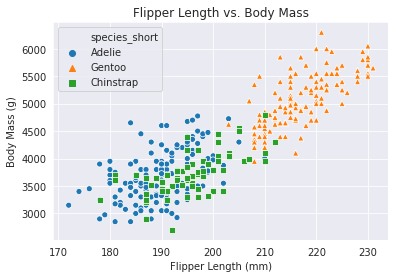

In [17]:
# Create the Flipper Length vs Body Mass plot
sns.set_style("darkgrid")
g = sns.scatterplot(x = 'flipper_length_mm_',
                    y = 'body_mass_g_',
                    hue = 'species_short',
                    style = 'species_short',
                    markers = ['o','^', 's'],
                    data = penguins_df)
g.set(xlabel = "Flipper Length (mm)",
      ylabel = 'Body Mass (g)',
      title = 'Flipper Length vs. Body Mass')

[Text(0, 0.5, 'Culmen Length (mm)'),
 Text(0.5, 0, 'Flipper Length (mm)'),
 Text(0.5, 1.0, 'Flipper Length vs. Culmen Length')]

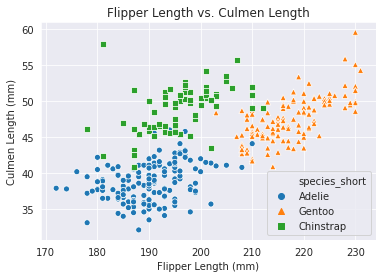

In [18]:
# Create the Flipper Length vs Body Mass plot
g = sns.scatterplot(x = 'flipper_length_mm_',
                    y ='culmen_length_mm_',
                    hue = 'species_short',
                    style = 'species_short',
                    markers = ['o','^', 's'],
                    data = penguins_df)

g.set(xlabel = "Flipper Length (mm)",
      ylabel = 'Culmen Length (mm)',
      title = 'Flipper Length vs. Culmen Length')

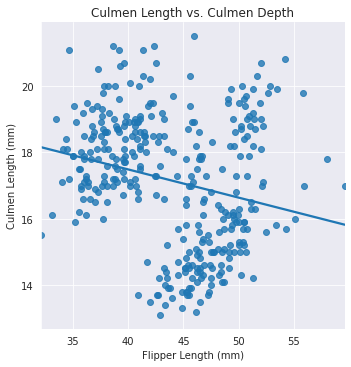

In [19]:
# Simpson's Paradox Examples
# Plot the Culmen length vs. culmen depth, omitting species
g = sns.lmplot(x = "culmen_length_mm_",
               y = "culmen_depth_mm_",
               ci = None,
               data = penguins_df)

g.set(xlabel = "Flipper Length (mm)",
      ylabel = 'Culmen Length (mm)',
      title = "Culmen Length vs. Culmen Depth")

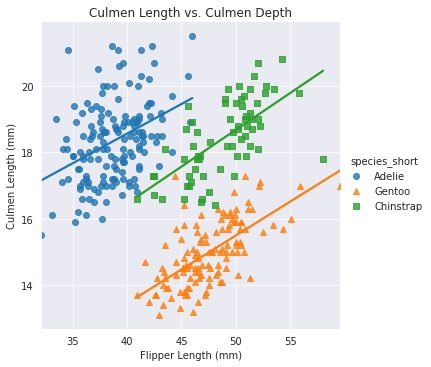

In [20]:
# Simpson's Paradox Examples
# Plot the Culmen length vs. culmen depth, including species
g = sns.lmplot(x = "culmen_length_mm_",
               y = "culmen_depth_mm_",
               hue = 'species_short',
               ci = None,
               markers = ['o','^', 's'],
               data = penguins_df)

g.set(xlabel = "Flipper Length (mm)",
      ylabel = 'Culmen Length (mm)',
      title = "Culmen Length vs. Culmen Depth")

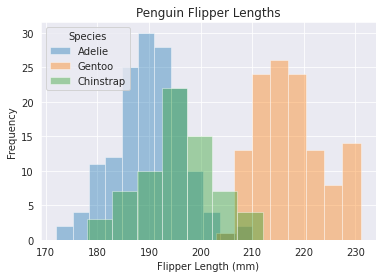

In [21]:
# Plot a histogram of flipper length for each penguin species
fig, ax = plt.subplots()
# for each species we iterate and plot a histogram of the flipper length.
for species in penguins_df.species_short.unique():
  sns.distplot(penguins_df.loc[penguins_df.species_short == species, 'flipper_length_mm_'],
            kde = False, label = species)

  ax.set_xlabel('Flipper Length (mm)')
  ax.set_ylabel('Frequency')
  ax.set_title('Penguin Flipper Lengths')
  ax.legend(title="Species")

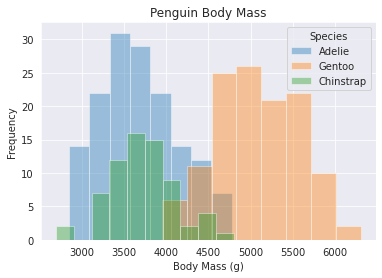

In [22]:
fig, ax = plt.subplots()
for species in penguins_df.species_short.unique():
  sns.distplot(penguins_df.loc[penguins_df.species_short == species, 'body_mass_g_'],
            kde=False, label=species)

  ax.set_xlabel('Body Mass (g)')
  ax.set_ylabel('Frequency')
  ax.set_title('Penguin Body Mass')
  ax.legend(title="Species")